##**Wykrywanie Anomalii przy użyciu PCA**
**Cel Ćwiczenia:**

Celem tego ćwiczenia jest zrozumienie i praktyczne zastosowanie Analizy Głównych Składowych (PCA) do wykrywania anomalii w danych.

**Co to jest PCA?**

Analiza Głównych Składowych (PCA) to technika redukcji wymiarowości stosowana w przetwarzaniu sygnałów i statystyce. PCA pozwala na zidentyfikowanie głównych składowych danych, które wyjaśniają największy procent wariancji w zbiorze danych. W kontekście wykrywania anomalii, PCA może być wykorzystane do zredukowania wymiarów danych do tych, które najlepiej przedstawiają normalny wzorzec danych, a następnie zidentyfikowania obserwacji, które odstają od tego wzorca.

**Zastosowania PCA w praktyce:**

PCA jest narzędziem o szerokim zakresie zastosowań, zarówno w dziedzinie nauki, jak i biznesu. Oto niektóre z przykładów, gdzie PCA może być wykorzystywane:

**Wykrywanie anomalii:** W wielu zastosowaniach przemysłowych i finansowych PCA jest wykorzystywane do identyfikacji niezwykłych wzorców, które mogą wskazywać na błędy, oszustwa lub inne anomalie.

**Redukcja szumów:** W obrazowaniu medycznym i przetwarzaniu sygnałów PCA pomaga w usunięciu szumów z danych, poprawiając jakość obrazów czy sygnałów.

**Kompresja danych:** W telekomunikacji i informatyce PCA umożliwia zmniejszenie rozmiaru danych poprzez usunięcie redundancji, co jest kluczowe w optymalizacji przechowywania i transmisji danych.

**Bioinformatyka:** W analizie ekspresji genów PCA pomaga w izolowaniu głównych wzorców zmienności i identyfikacji genów, które mają kluczowe znaczenie dla określonych stanów biologicznych lub chorób.

**Finanse:** W zarządzaniu portfelem i ryzykiem PCA jest wykorzystywane do identyfikacji głównych czynników ryzyka i zrozumienia struktury korelacji między różnymi aktywami.

**Rozpoznawanie wzorców:** W uczeniu maszynowym i analizie obrazów PCA pomaga w wyodrębnieniu istotnych cech, które ułatwiają klasyfikację lub rozpoznawanie obiektów.

W każdym z tych zastosowań, kluczową zaletą PCA jest zdolność do ujawnienia wewnętrznej struktury danych, często ukrytej w wysokowymiarowych zbiorach danych, i umożliwienia podejmowania bardziej świadomych decyzji na podstawie ujednoliconej i zredukowanej formy danych.

## **Krok 1: Przygotowanie Danych i Wstępna Eksploracja**

Przed zastosowaniem PCA należy najpierw wczytać dane, a następnie zbadać ich rozkład. Wizualizacja rozkładu pomoże zrozumieć, czy w danych istnieją klasy, które są mniej liczne, a co za tym idzie - potencjalnie mogą zawierać więcej anomalii.

In [1]:
# Import niezbędnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Wczytanie danych
train = pd.read_csv("train.csv")

# Podział danych na cechy i etykietę
X = train.drop('label', axis=1)
y = train['label'].astype('category')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


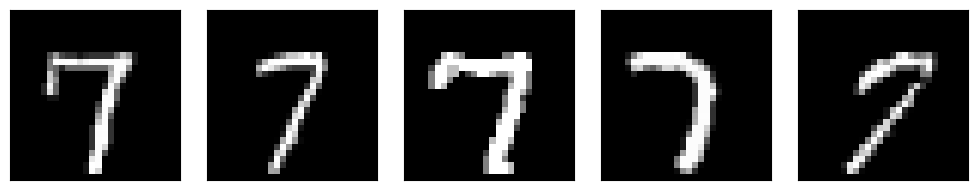

In [2]:
# Wizualizacja kilku przykładów obrazów dla wybranej cyfry
def plot_digits(data, digit, num_images=5):
    images = data[y == digit].head(num_images)
    num_rows = 1
    num_cols = num_images

    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images.iloc[i].values.reshape(28,28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

# Wyświetlenie obrazów dla cyfry 7 jako przykład
plot_digits(X, 7)

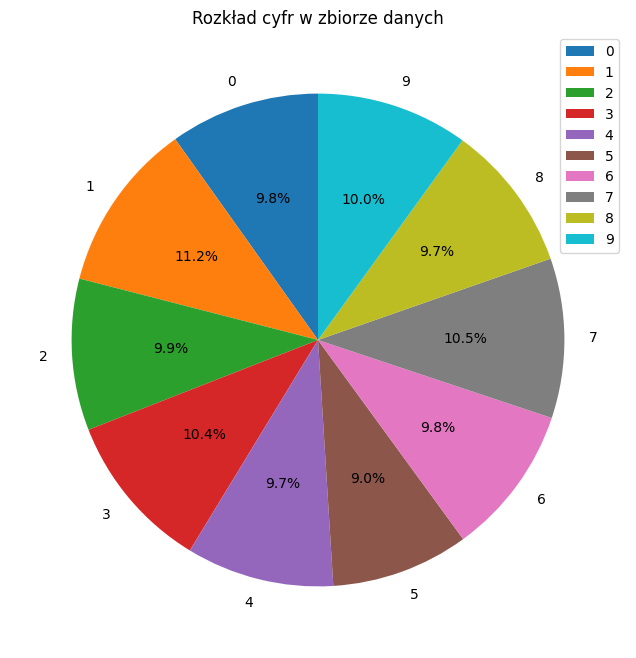

In [3]:
# Wizualizacja rozkładu cyfr w zbiorze danych
rozkład_cyfr = y.value_counts().sort_index()
plt.figure(figsize=(10, 8))
rozkład_cyfr.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Rozkład cyfr w zbiorze danych')
plt.ylabel('')
plt.show()

Zadanie dla Studentów:

Wczytaj dane i przeanalizuj ich rozkład. Czy istnieją cyfry, które występują znacznie rzadziej? Wizualizuj kilka przykładów obrazów dla kilku wybranych cyfr. Czy zauważasz jakieś nietypowe cechy?

Rozwiązanie:


## **Krok 2: Wybór Cyfry i Analiza za pomocą PCA**

Wybierając określoną cyfrę, skupimy się na analizie tylko jednej klasy. Następnie, zastosujemy PCA, aby zredukować wymiarowość danych, co pozwoli nam na wizualizację i identyfikację potencjalnych anomalii.

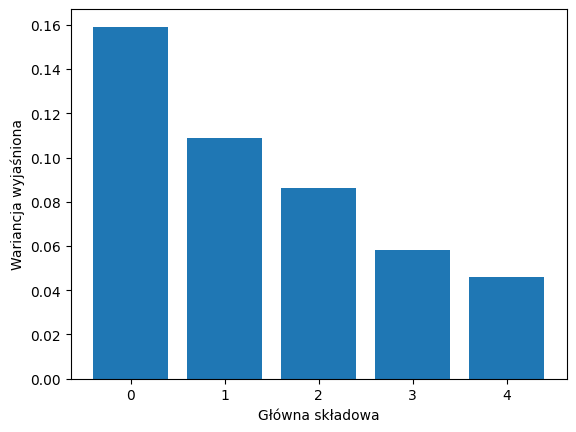

In [8]:
# Wybór cyfry do analizy
wybrana_cyfra = 7  # Studenci powinni zmienić tę liczbę, aby badać różne cyfry
zbiór_wybranej_cyfry = X[y == wybrana_cyfra].reset_index(drop=True)

# Wykonanie PCA na podzbiorze dla wybranej cyfry
liczba_składowych = 5  # Studenci mogą zmodyfikować liczbę składowych
pca = PCA(n_components=liczba_składowych)
pca_zbiór_wybranej_cyfry = pca.fit_transform(zbiór_wybranej_cyfry)

# Obliczenie odwrotnej transformacji w celu odtworzenia oryginalnych danych
odtworzony_podzbiór = pca.inverse_transform(pca_zbiór_wybranej_cyfry)

# Obliczenie błędu średniokwadratowego (MSE) dla każdej instancji
MSE = ((zbiór_wybranej_cyfry - odtworzony_podzbiór) ** 2).mean(axis=1)

# Wyświetlenie wariancji wyjaśnionej przez każdą składową główną
plt.figure()
plt.bar(range(liczba_składowych), pca.explained_variance_ratio_)
plt.xlabel('Główna składowa')
plt.ylabel('Wariancja wyjaśniona')
plt.show()


Zadanie dla Studentów:

Zmodyfikuj wybrana_cyfra i liczba_składowych w kodzie, a następnie przeanalizuj wyjaśnioną wariancję przez każdą z głównych składowych. Jak zmiana tych parametrów wpływa na wyniki? Czy możesz zidentyfikować anomalie dla różnych cyfr?

Rozwiązanie:


##**Krok 3: Wykrywanie anomalii wśród wszystkich cyfr**

Po zastosowaniu PCA do wybranej cyfry, kolejnym krokiem jest rozszerzenie analizy na wszystkie cyfry w zbiorze danych. Wykorzystując wartości błędu średniokwadratowego (MSE), możemy ustalić próg, powyżej którego obserwacje będą uważane za anomalie.

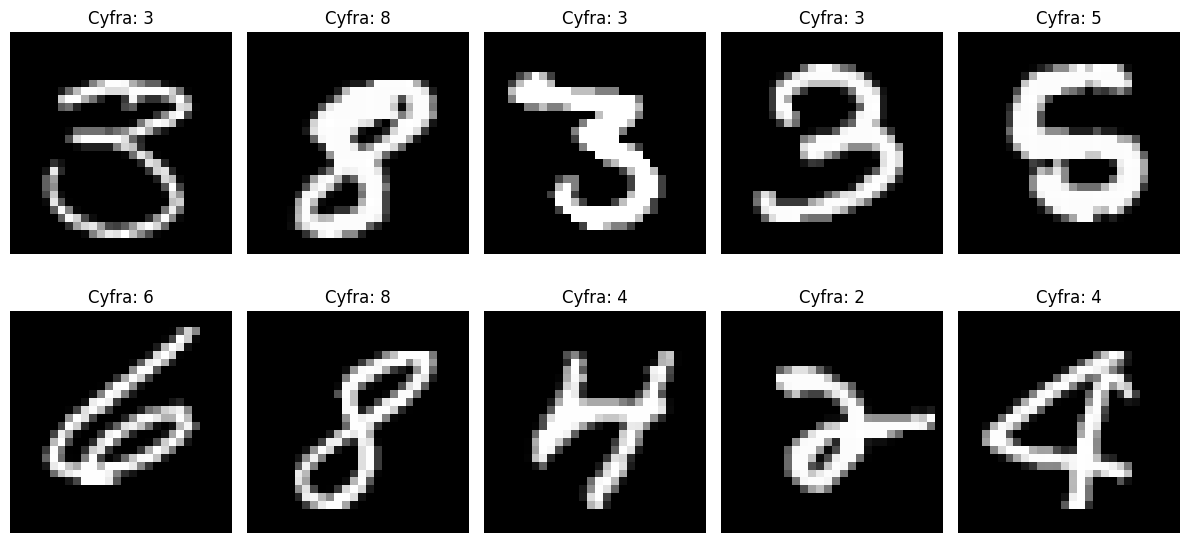

In [15]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_inverse = pca.inverse_transform(X_pca)
MSE = np.mean(np.power(X - X_inverse, 2), axis=1)
threshold = np.percentile(MSE, 80)
anomalies = MSE > threshold

# Wizualizacja obrazów uznanych za anomalie
anomalie_indices = np.where(anomalies)[0]
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(anomalie_indices):
        ax.imshow(X.iloc[anomalie_indices[i]].values.reshape(28,28), cmap='gray')
        ax.set_title(f"Cyfra: {y.iloc[anomalie_indices[i]]}")
        ax.axis('off')
plt.tight_layout()
plt.show()


Zadanie dla Studentów:

Zbadaj procentową wartość błędu MSE dla różnych percentyli i ustal próg, który według Ciebie najlepiej wykrywa anomalie. Jak zmiana progu wpływa na liczbę wykrytych anomalii? Czy niektóre cyfry są bardziej skłonne do bycia klasyfikowanymi jako anomalie?

Rozwiązanie:


##**Krok 4: Wpływ jakości danych na PCA**

Jakość danych jest kluczowa dla każdej analizy statystycznej. Wprowadzenie szumu do danych może wpłynąć na wyniki PCA, zatem warto badać, jak PCA radzi sobie w różnych warunkach.



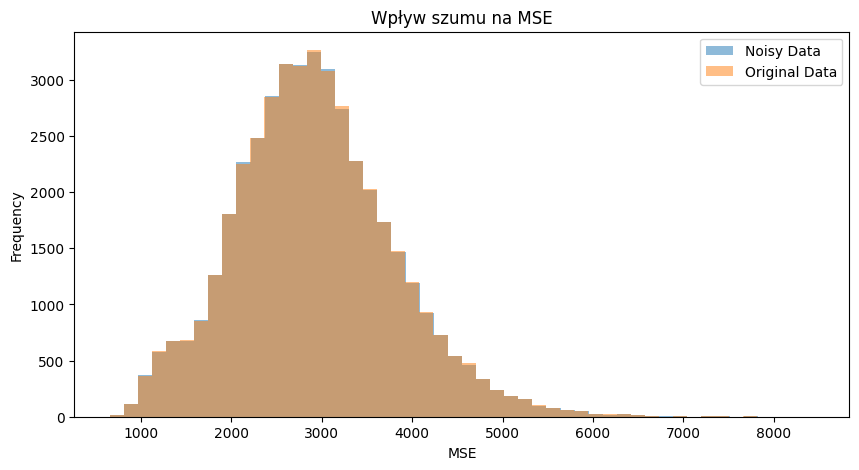

In [6]:
szum = np.random.normal(0, 0.5, X.shape)
X_noisy = X + szum
pca_noisy = PCA(n_components=5)
X_noisy_pca = pca_noisy.fit_transform(X_noisy)
X_noisy_inverse = pca_noisy.inverse_transform(X_noisy_pca)
MSE_noisy = np.mean(np.power(X_noisy - X_noisy_inverse, 2), axis=1)

# Wizualizacja wpływu szumu na MSE
plt.figure(figsize=(10, 5))
plt.hist(MSE_noisy, bins=50, alpha=0.5, label='Noisy Data')
plt.hist(MSE, bins=50, alpha=0.5, label='Original Data')
plt.legend()
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Wpływ szumu na MSE')
plt.show()


Zadanie dla Studentów:

Eksperymentuj z różnymi poziomami szumu i obserwuj, jak zmienia się MSE. Jak dodanie szumu do danych wpływa na wykrywanie anomalii przez PCA?

Rozwiązanie:


##**Krok 5: Dogłębne zrozumienie PCA i wykrywanie anomalii**

PCA nie tylko redukuje wymiarowość danych, ale także pomaga w zrozumieniu struktury danych. Analiza wektorów własnych i wyjaśniona wariancja dają wgląd w to, jakie cechy są najważniejsze dla danych.

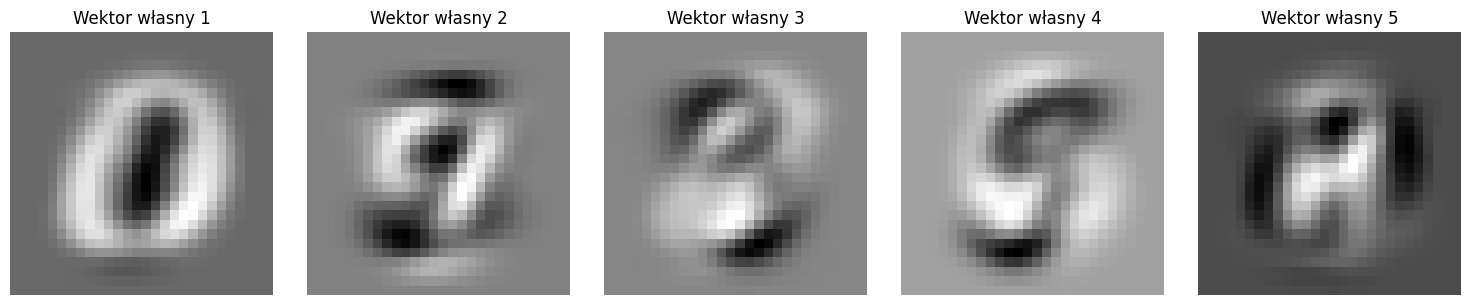

In [7]:
# Analiza wektorów własnych
pca = PCA(n_components=5).fit(X)
eigenvalues = pca.components_

# Wizualizacja wektorów własnych
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenvalues[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Wektor własny {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


Zadanie dla Studentów:

Analizuj wektory własne i wyjaśnioną wariancję. Co mówią Ci te wektory o danych? Czy możesz zidentyfikować, które cechy cyfr są najważniejsze?

Rozwiązanie:


##**Ogólne Wnioski z Analizy:**
Po przeprowadzeniu powyższych analiz, studenci powinni dojść do następujących wniosków:


1. Czy wybór liczby składowych i próg dla MSE ma istotny wpływ na wykrywanie anomalii?


2. Czy jakość danych, w tym obecność szumu, może wpłynąć na skuteczność PCA w identyfikacji anomalii?


3. Co daje nam analiza wektorów własnych? czy może t0 ułatwić interpretację wyników i wykrywanie anomalii?